In [2]:
import networkx as nx
import pandas as pd
import itertools
import os
import matplotlib.pyplot as plt  # Import correct de pyplot depuis Matplotlib

from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/camembert-ner")
model = AutoModelForTokenClassification.from_pretrained("Jean-Baptiste/camembert-ner")

nlp = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple")

def extract_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

def nombre_mots_entre_mots(mots, mot1, mot2):
    if mot1 in mots and mot2 in mots:
        index_mot1 = mots.index(mot1)
        index_mot2 = mots.index(mot2)
        nombre_mots_entre = abs(index_mot2 - index_mot1) - 1
        return nombre_mots_entre
    else:
        return -1  # Si l'un des mots n'est pas trouvé

In [6]:
ma_liste = ['CLÉON Ier—', 'Empereur']
resultat = ';'.join(ma_liste)
resultat_final = '"' + resultat + '"'
print(resultat_final)


"CLÉON Ier—;Empereur"


pour: CLÉON Ier—, les alias sont: CLEON Ier--;Cleon
pour: Empereur, les alias sont: Empereur
pour: CLÉON Ier—, les alias sont: CLEON Ier--;Cleon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: CLÉON Ier—, les alias sont: CLEON Ier--;Cleon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: CLÉON Ier—, les alias sont: CLEON Ier--;Cleon
pour: Cléon, les alias sont: CLEON Ier--;Cleon
pour: CLÉON Ier—, les alias sont: CLEON Ier--;Cleon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: CLÉON Ier—, les alias sont: CLEON Ier--;Cleon
pour: Cléon, les alias sont: CLEON Ier--;Cleon
pour: CLÉON Ier—, les alias sont: CLEON Ier--;Cleon
pour: Eto Demerzel, les alias sont: Eto Demerzel;Demerzel
pour: CLÉON Ier—, les alias sont: CLEON Ier--;Cleon
pour: Cléon, les alias sont: CLEON Ier--;Cleon
pour: CLÉON Ier—, les alias sont: CLEON Ier--;Cleon
pour: Cléon, les alias sont: CLEON Ier--;Cleon
pour: CLÉON Ier—, les alias sont: CLEON Ier--;Cleon
pour: Demerzel, les alias sont: Eto Demer

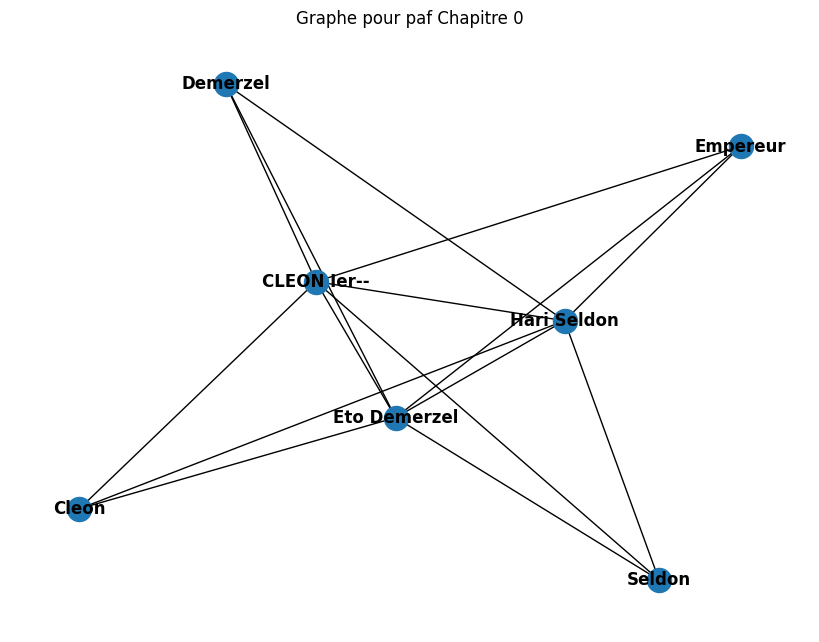

pour: Cléon Ier, les alias sont: Cleon Ier
pour: Seldon, les alias sont: Seldon
pour: Cléon Ier, les alias sont: Cleon Ier
pour: Seldon, les alias sont: Seldon
pour: Cléon Ier, les alias sont: Cleon Ier
pour: Seldon, les alias sont: Seldon
pour: Cléon Ier, les alias sont: Cleon Ier
pour: Marbie, les alias sont: Marbie
pour: Cléon Ier, les alias sont: Cleon Ier
pour: Marbie, les alias sont: Marbie
pour: Cléon Ier, les alias sont: Cleon Ier
pour: Marbie, les alias sont: Marbie
pour: Cléon Ier, les alias sont: Cleon Ier
pour: Alem, les alias sont: Alem
pour: Cléon Ier, les alias sont: Cleon Ier
pour: Marbie, les alias sont: Marbie
pour: Cléon Ier, les alias sont: Cleon Ier
pour: Alem, les alias sont: Alem
pour: Cléon Ier, les alias sont: Cleon Ier
pour: Marbie, les alias sont: Marbie
pour: Cléon Ier, les alias sont: Cleon Ier
pour: Hummin, les alias sont: Hummin
pour: Cléon Ier, les alias sont: Cleon Ier
pour: Alem, les alias sont: Alem
pour: Cléon Ier, les alias sont: Cleon Ier
pour: Mar

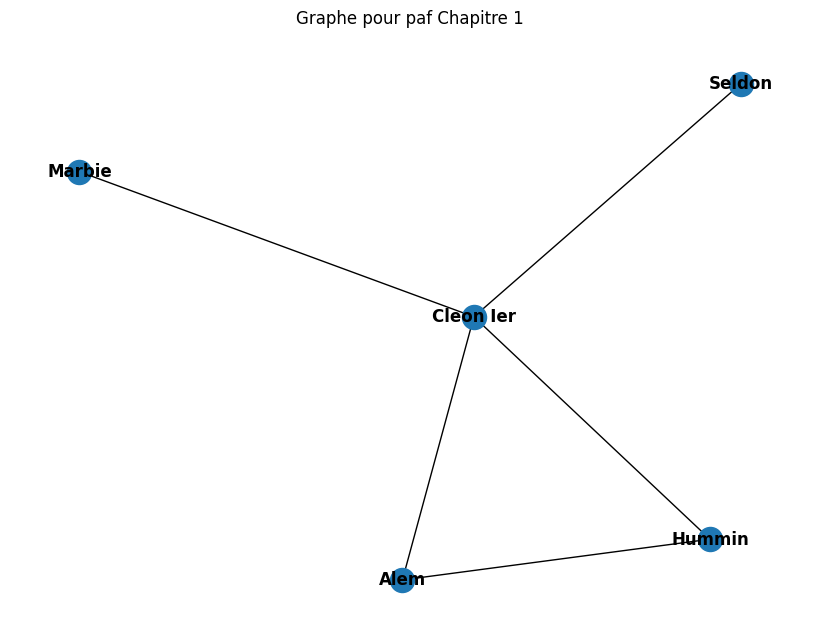

pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Hummin, les alias sont: Hummin
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Hummin, les alias sont: Hummin
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Hummin, les alias sont: Hummin
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Hummin, les alias sont: Hummin
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon


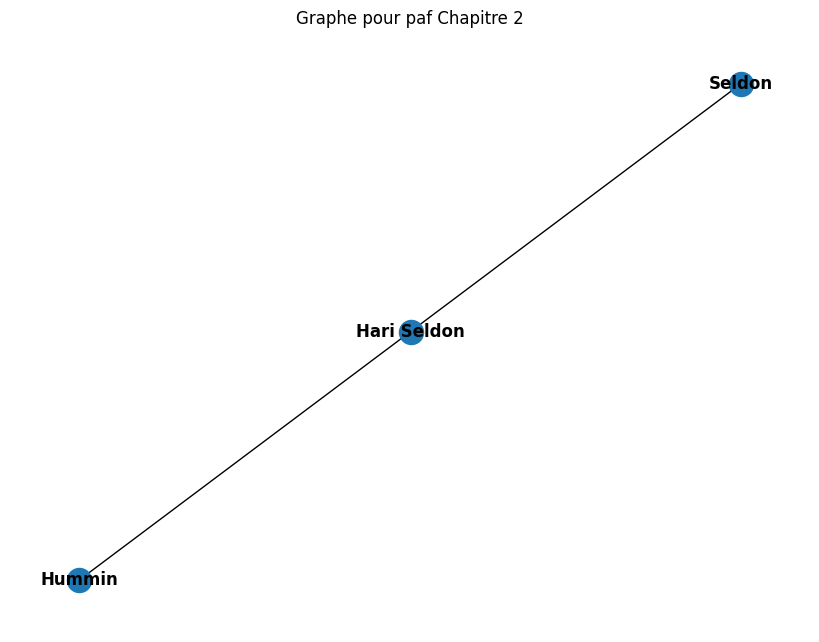

pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Hummin, les alias sont: Hummin
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Hummin, les alias sont: Hummin
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Hummin, les alias sont: Hummin
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Demerzel, les alias sont: Demerzel
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Demerzel, les alias sont: Demerzel
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Hummin, les alias sont: Hummin
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont:

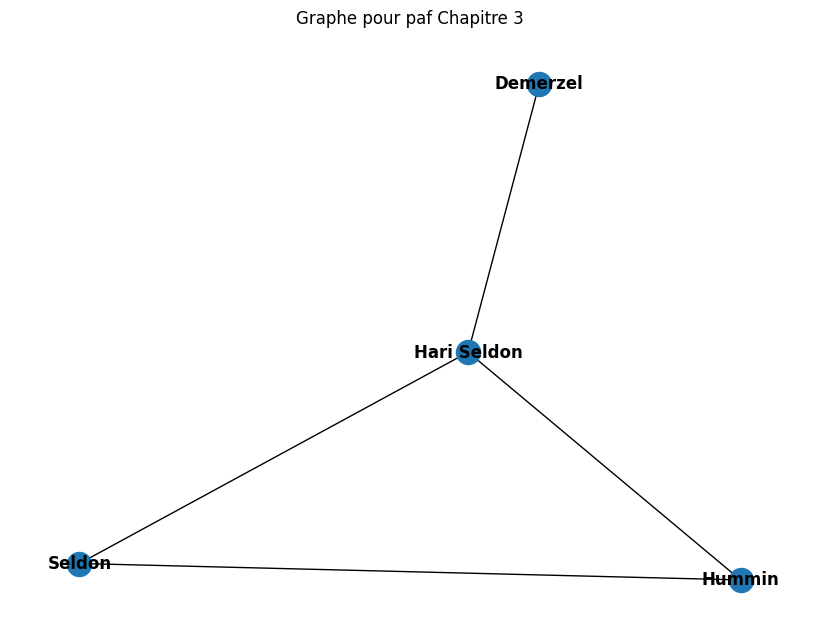

pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Hummin, les alias sont: Hummin
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Lisung Randa, les alias sont: Lisung Randa;Randa
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Randa, les alias sont: Lisung Randa;Randa
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Dors, les alias sont: Dors
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Randa, les alias sont: Lisung Randa;Randa
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Randa, les alias sont: Lisung Randa;Randa
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hummin, les alias sont: Hummin
pour: Lisung Randa, les alias sont: Lisung Randa;Randa
pour: 

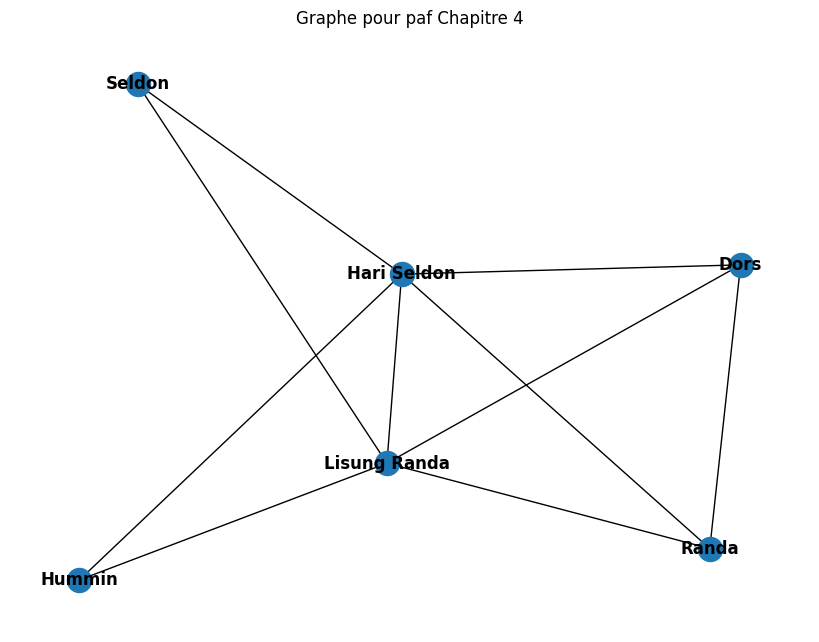

pour: Seldon, les alias sont: Seldon;Hari Seldon
pour: Dors Venabili, les alias sont: Dors Venabili;Dors
pour: Seldon, les alias sont: Seldon;Hari Seldon
pour: Jenarr Leggen, les alias sont: Leggen;Jenarr Leggen
pour: Seldon, les alias sont: Seldon;Hari Seldon
pour: Hari Seldon, les alias sont: Seldon;Hari;Hari Seldon
pour: Seldon, les alias sont: Seldon;Hari Seldon
pour: Héliconien, les alias sont: Heliconien
pour: Seldon, les alias sont: Seldon;Hari Seldon
pour: Hari Seldon, les alias sont: Seldon;Hari;Hari Seldon
pour: Leggen, les alias sont: Leggen;Jenarr Leggen
pour: Dors Venabili, les alias sont: Dors Venabili;Dors
pour: Leggen, les alias sont: Leggen;Jenarr Leggen
pour: Jenarr Leggen, les alias sont: Leggen;Jenarr Leggen
pour: Leggen, les alias sont: Leggen;Jenarr Leggen
pour: Hari Seldon, les alias sont: Seldon;Hari;Hari Seldon
pour: Leggen, les alias sont: Leggen;Jenarr Leggen
pour: Héliconien, les alias sont: Heliconien
pour: Leggen, les alias sont: Leggen;Jenarr Leggen
pour:

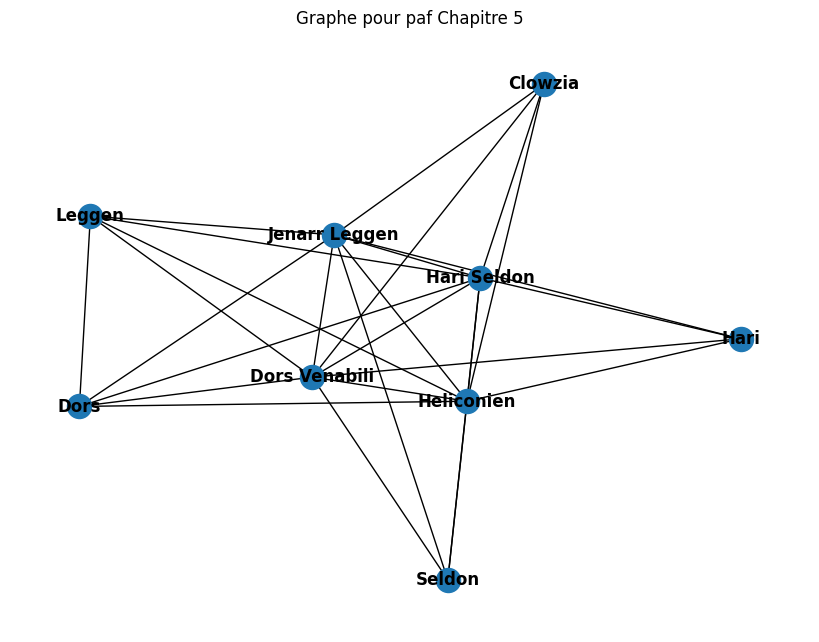

pour: Seldon, les alias sont: Seldon
pour: Hummin, les alias sont: Hummin
pour: Seldon, les alias sont: Seldon
pour: Hummin, les alias sont: Hummin
pour: Seldon, les alias sont: Seldon
pour: Hummin, les alias sont: Hummin
pour: Seldon, les alias sont: Seldon
pour: Hummin, les alias sont: Hummin
pour: Seldon, les alias sont: Seldon
pour: Eto Demerzel, les alias sont: Eto Demerzel
pour: Seldon, les alias sont: Seldon
pour: Hummin, les alias sont: Hummin
pour: Hummin, les alias sont: Hummin
pour: Seldon, les alias sont: Seldon
pour: Hummin, les alias sont: Hummin
pour: Eto Demerzel, les alias sont: Eto Demerzel
pour: Dors, les alias sont: Dors
pour: Eto Demerzel, les alias sont: Eto Demerzel
pour: Hummin, les alias sont: Hummin
pour: Seldon, les alias sont: Seldon
pour: Hummin, les alias sont: Hummin
pour: Eto Demerzel, les alias sont: Eto Demerzel
pour: Dors, les alias sont: Dors
pour: Eto Demerzel, les alias sont: Eto Demerzel
pour: Hummin, les alias sont: Hummin
pour: Seldon, les alias

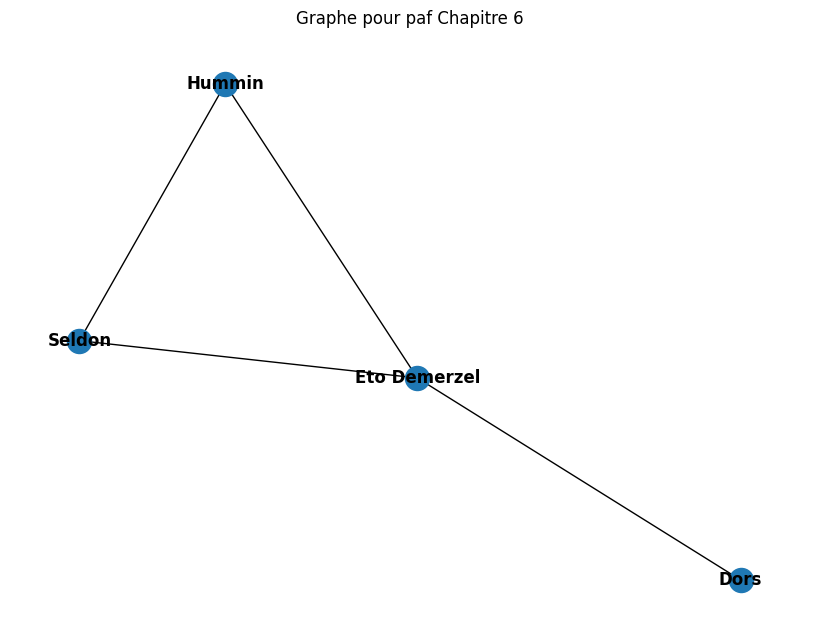

pour: Trantor, les alias sont: Trantor
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Trantor, les alias sont: Trantor
pour: Endor Levanian, les alias sont: Endor Levanian;Levanian
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Dors, les alias sont: Dors
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Endor Levanian, les alias sont: Endor Levanian;Levanian
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Dors, les alias sont: Dors
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Levanian, les alias sont: Endor Levanian;Levanian
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Levanian, les alias sont: Endor Levanian;Levanian
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari S

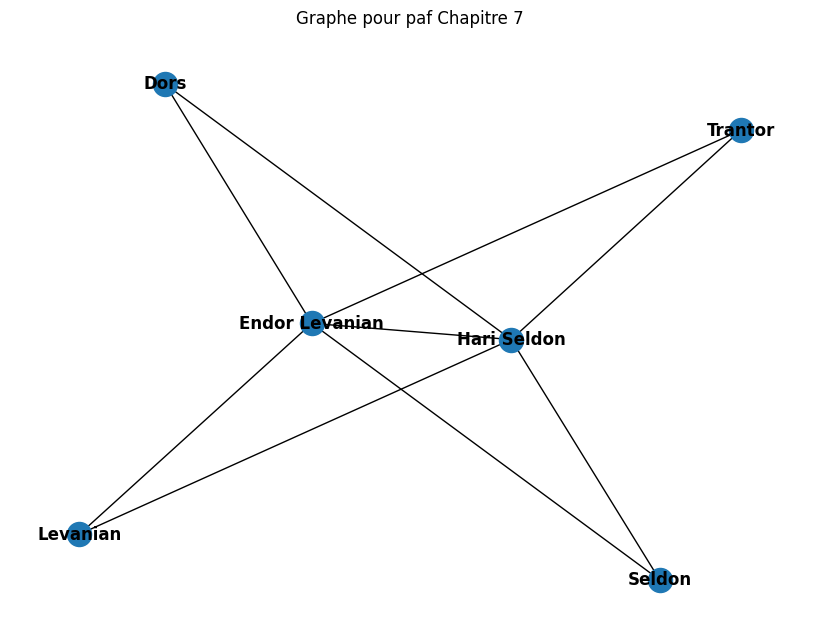

pour: Mycogène, les alias sont: Mycogene
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Mycogène, les alias sont: Mycogene
pour: Grisnuage, les alias sont: Grisnuage
pour: Mycogène, les alias sont: Mycogene
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Mycogène, les alias sont: Mycogene
pour: Grisnuage, les alias sont: Grisnuage
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Grisnuage, les alias sont: Grisnuage
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Dors, les alias sont: Dors
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Grisnuage, les alias sont: Grisnuage
pour: Grisnuage, les alias sont: Grisnuage
pour: Dors, les alias sont: Dors


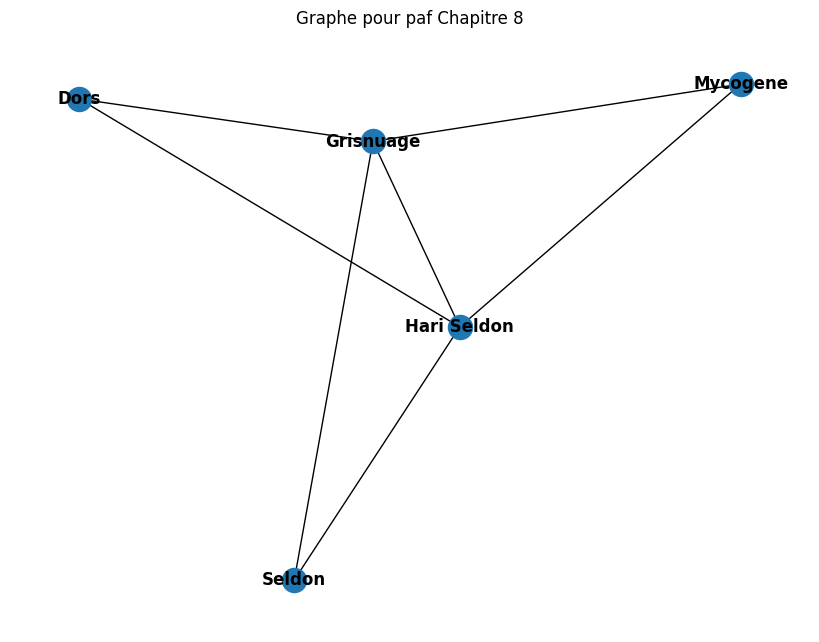

pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Goutte-de-Pluie Quarante-trois, les alias sont: Goutte-de-Pluie Quarante-trois
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Frère, les alias sont: Frere
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Mycogène, les alias sont: Mycogene
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Goutte-de-Pluie Quarante-trois, les alias sont: Goutte-de-Pluie Quarante-trois
pour: Goutte-de-Pluie Quarante-trois, les alias sont: Goutte-de-Pluie Quarante-trois
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Goutte-de-Pluie Quarante-trois, les alias sont: Goutte-de-Pluie Quarante-trois
pour: Seldon, l

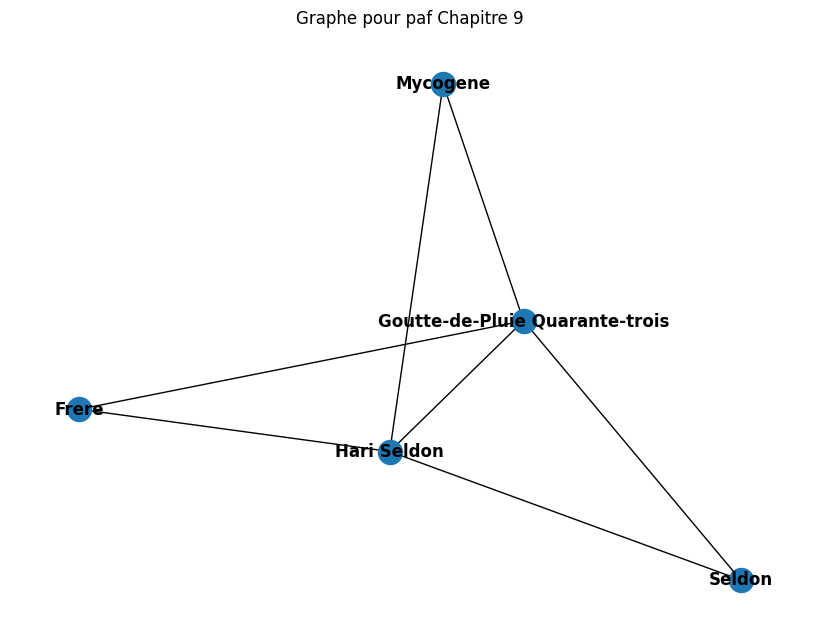

pour: Goutte-de-Pluie, les alias sont: Goutte-de-Pluie;Goutte-de-Pluie Quarante-cinq;Goutte-de-Pluie Quarante-trois
pour: Goutte-de-Pluie Quarante-cinq, les alias sont: Goutte-de-Pluie;Goutte-de-Pluie Quarante-cinq
pour: Goutte-de-Pluie, les alias sont: Goutte-de-Pluie;Goutte-de-Pluie Quarante-cinq;Goutte-de-Pluie Quarante-trois
pour: Goutte-de-Pluie Quarante-trois, les alias sont: Goutte-de-Pluie;Goutte-de-Pluie Quarante-trois
pour: Goutte-de-Pluie, les alias sont: Goutte-de-Pluie;Goutte-de-Pluie Quarante-cinq;Goutte-de-Pluie Quarante-trois
pour: Goutte-de-Pluie Quarante-trois, les alias sont: Goutte-de-Pluie;Goutte-de-Pluie Quarante-trois
pour: Goutte-de-Pluie, les alias sont: Goutte-de-Pluie;Goutte-de-Pluie Quarante-cinq;Goutte-de-Pluie Quarante-trois
pour: Goutte-de-Pluie Quarante-cinq, les alias sont: Goutte-de-Pluie;Goutte-de-Pluie Quarante-cinq
pour: Goutte-de-Pluie Quarante-cinq, les alias sont: Goutte-de-Pluie;Goutte-de-Pluie Quarante-cinq
pour: Goutte-de-Pluie Quarante-trois,

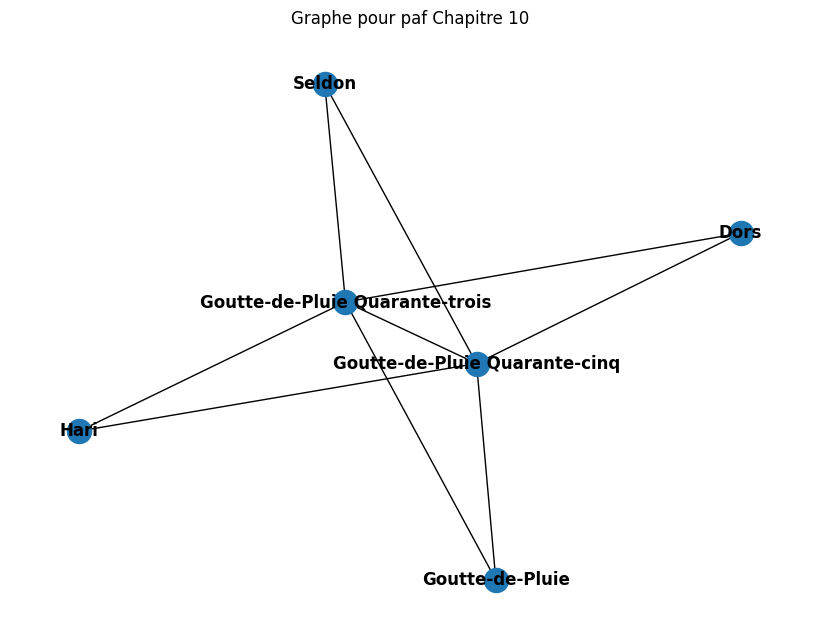

pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Dors Venabili, les alias sont: Dors Venabili;Dors
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Dors, les alias sont: Dors Venabili;Dors
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Mycélium Soixante-douze, les alias sont: Mycelium Soixante-douze
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Hari Seldon;Seld

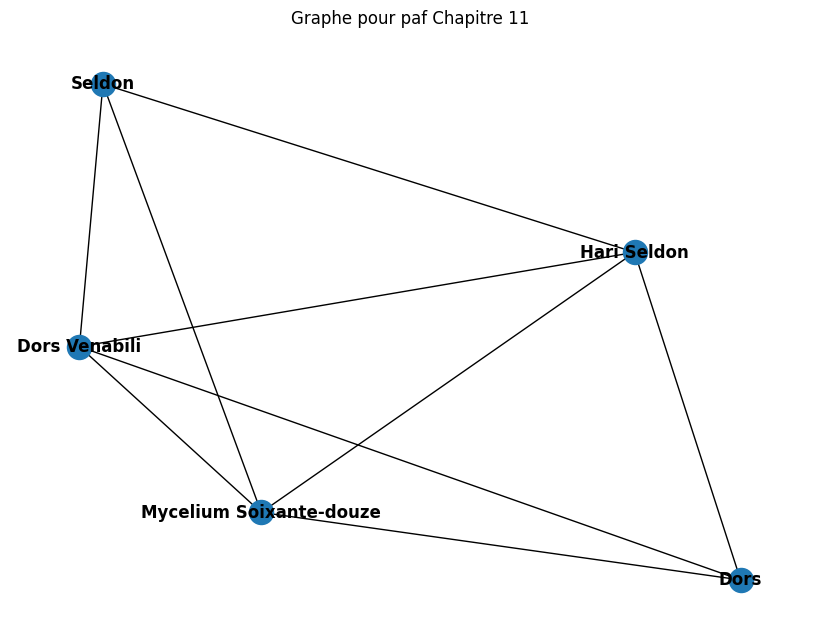

pour: Hari Seldon, les alias sont: Hari Seldon;Seldon;L;l
pour: Seldon, les alias sont: Hari Seldon;Seldon;L;l
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon;L;l
pour: L, les alias sont: Hari Seldon;Seldon;L;l;Demerzel;Cleon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon;L;l
pour: Empereur, les alias sont: Empereur;Empereurs
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon;L;l
pour: l, les alias sont: Hari Seldon;Seldon;L;l;Demerzel;Cleon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon;L;l
pour: Empereur, les alias sont: Empereur;Empereurs
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon;L;l
pour: l, les alias sont: Hari Seldon;Seldon;L;l;Demerzel;Cleon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon;L;l
pour: Empereur, les alias sont: Empereur;Empereurs
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon;L;l
pour: Demerzel, les alias sont: L;l;Demerzel
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon;L;l
pour: Cléon, les alias sont: L;l;Cleon

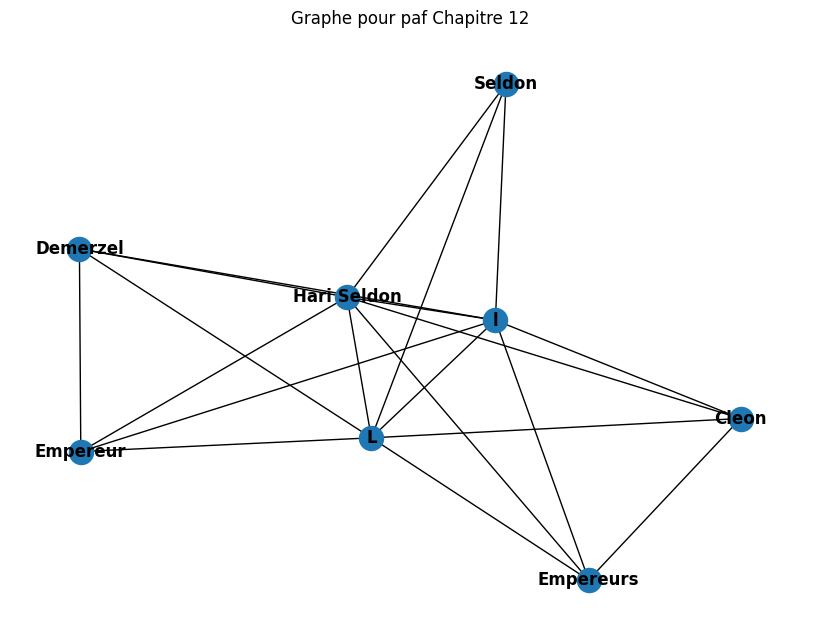

pour: DAHL, les alias sont: DAHL
pour: Hari Seldon, les alias sont: Hari Seldon;Hari
pour: DAHL, les alias sont: DAHL
pour: Dors Venabili, les alias sont: Dors Venabili;Dors
pour: DAHL, les alias sont: DAHL
pour: Hari Seldon, les alias sont: Hari Seldon;Hari
pour: DAHL, les alias sont: DAHL
pour: Dors Venabili, les alias sont: Dors Venabili;Dors
pour: DAHL, les alias sont: DAHL
pour: Dors, les alias sont: Dors Venabili;Dors
pour: DAHL, les alias sont: DAHL
pour: ― Mère, les alias sont: -- Mere
pour: DAHL, les alias sont: DAHL
pour: Dors, les alias sont: Dors Venabili;Dors
pour: DAHL, les alias sont: DAHL
pour: Hari, les alias sont: Hari Seldon;Hari
pour: DAHL, les alias sont: DAHL
pour: Dors, les alias sont: Dors Venabili;Dors
pour: DAHL, les alias sont: DAHL
pour: Hari, les alias sont: Hari Seldon;Hari
pour: Hari Seldon, les alias sont: Hari Seldon;Hari
pour: Dors Venabili, les alias sont: Dors Venabili;Dors
pour: Hari Seldon, les alias sont: Hari Seldon;Hari
pour: Dors Venabili, les 

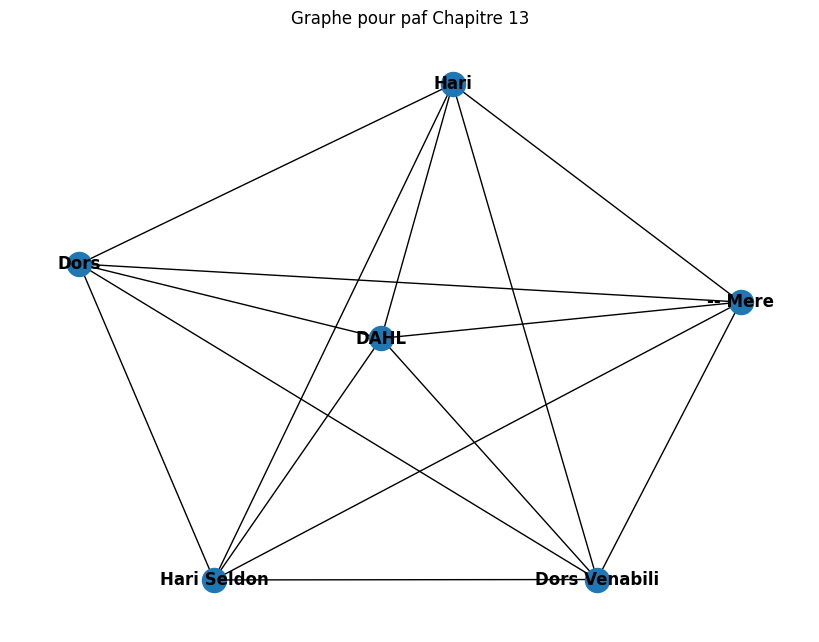

pour: Davan, les alias sont: Davan
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Davan, les alias sont: Davan
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Davan, les alias sont: Davan
pour: Dors Venabili, les alias sont: Dors Venabili;Dors
pour: Davan, les alias sont: Davan
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Davan, les alias sont: Davan
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Davan, les alias sont: Davan
pour: Maître Tisalver, les alias sont: Tisalver;Maitre Tisalver
pour: Davan, les alias sont: Davan
pour: Maîtresse Venabili, les alias sont: Maitresse;Maitresse Venabili
pour: Davan, les alias sont: Davan
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Dors Venabili, les alias sont: Dors Venabili;Dors
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Tisalver, les alias sont: Tisalver;Maitre Tisalver
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon

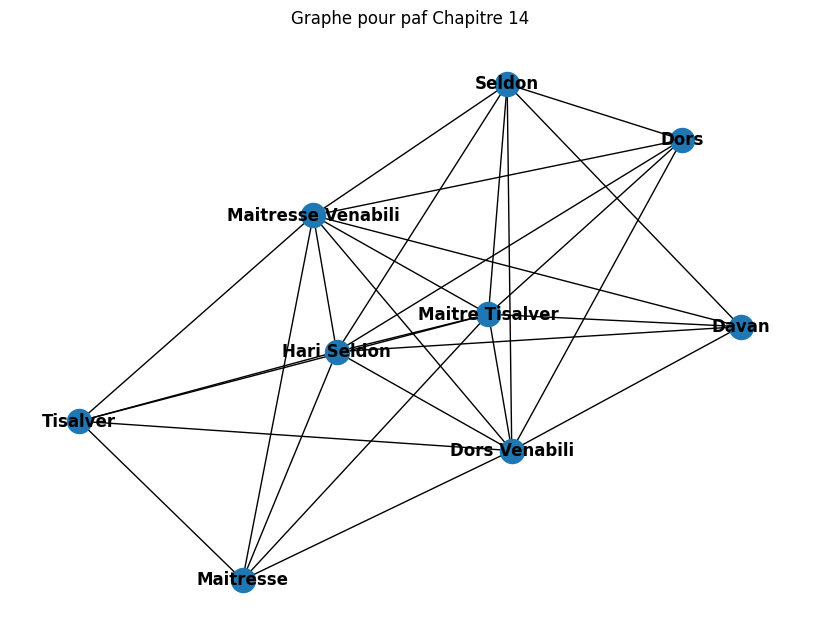

pour: RAYCH, les alias sont: RAYCH;Raych
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon;Hari
pour: RAYCH, les alias sont: RAYCH;Raych
pour: Raych, les alias sont: RAYCH;Raych
pour: RAYCH, les alias sont: RAYCH;Raych
pour: ALACT, les alias sont: ALACT
pour: RAYCH, les alias sont: RAYCH;Raych
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: RAYCH, les alias sont: RAYCH;Raych
pour: Dors, les alias sont: Dors
pour: RAYCH, les alias sont: RAYCH;Raych
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: RAYCH, les alias sont: RAYCH;Raych
pour: Dors, les alias sont: Dors
pour: RAYCH, les alias sont: RAYCH;Raych
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: RAYCH, les alias sont: RAYCH;Raych
pour: Dors, les alias sont: Dors
pour: RAYCH, les alias sont: RAYCH;Raych
pour: Hari, les alias sont: Hari Seldon;Hari
pour: RAYCH, les alias sont: RAYCH;Raych
pour: Seldon, les alias sont: Hari Seldon;Seldon
pour: RAYCH, les alias sont: RAYCH;Raych
pour: Dors, les alias sont: Dors


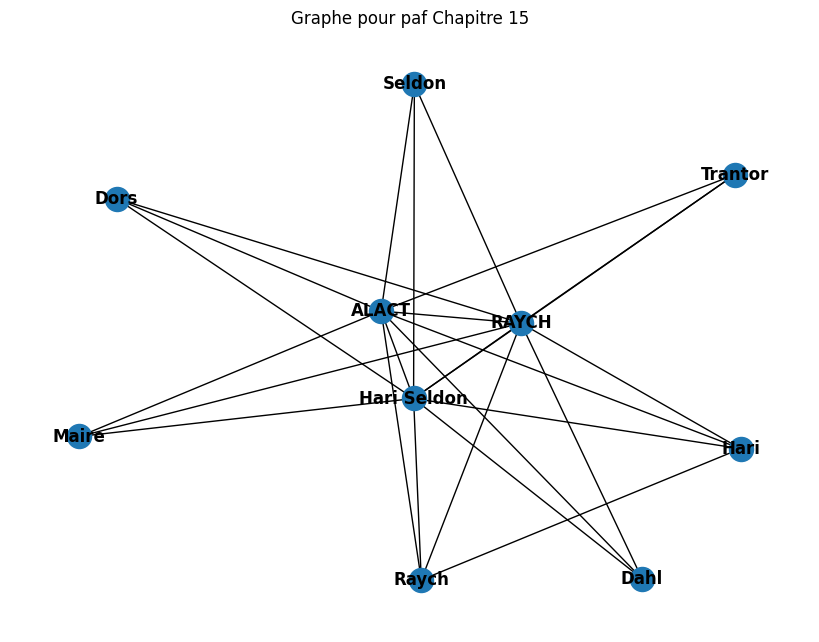

pour: , les alias sont: ;s;Mannix IV;Mycogene;Seldon;Emmer Thalus;Hari Seldon;Thalus;Dors
pour: s, les alias sont: ;s;Seldon;Emmer Thalus;Hari Seldon;Thalus;Dors
pour: , les alias sont: ;s;Mannix IV;Mycogene;Seldon;Emmer Thalus;Hari Seldon;Thalus;Dors
pour: Mannix IV, les alias sont: ;Mannix IV
pour: , les alias sont: ;s;Mannix IV;Mycogene;Seldon;Emmer Thalus;Hari Seldon;Thalus;Dors
pour: Mycogène, les alias sont: ;Mycogene
pour: , les alias sont: ;s;Mannix IV;Mycogene;Seldon;Emmer Thalus;Hari Seldon;Thalus;Dors
pour: Seldon, les alias sont: ;s;Seldon;Hari Seldon
pour: , les alias sont: ;s;Mannix IV;Mycogene;Seldon;Emmer Thalus;Hari Seldon;Thalus;Dors
pour: Seldon, les alias sont: ;s;Seldon;Hari Seldon
pour: , les alias sont: ;s;Mannix IV;Mycogene;Seldon;Emmer Thalus;Hari Seldon;Thalus;Dors
pour: Emmer Thalus, les alias sont: ;s;Emmer Thalus;Thalus
pour: , les alias sont: ;s;Mannix IV;Mycogene;Seldon;Emmer Thalus;Hari Seldon;Thalus;Dors
pour: Hari Seldon, les alias sont: ;s;Seldon;Hari

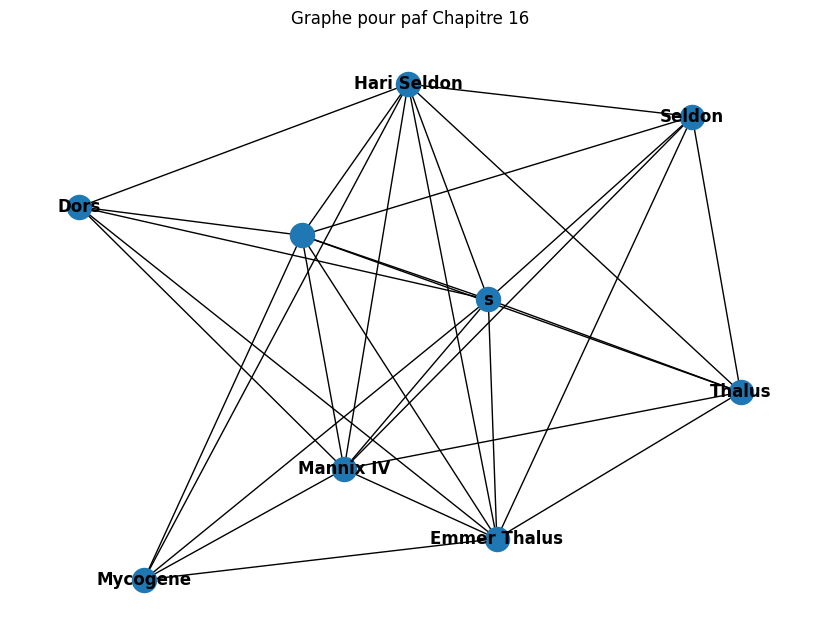

pour: THALUS, les alias sont: THALUS
pour: Seldon, les alias sont: Seldon
pour: THALUS, les alias sont: THALUS
pour: Dors Venabili, les alias sont: Dors Venabili;Dors
pour: THALUS, les alias sont: THALUS
pour: Raych, les alias sont: Raych
pour: THALUS, les alias sont: THALUS
pour: Maire a, les alias sont: Maire a
pour: THALUS, les alias sont: THALUS
pour: Seldon, les alias sont: Seldon
pour: THALUS, les alias sont: THALUS
pour: Seldon, les alias sont: Seldon
pour: THALUS, les alias sont: THALUS
pour: Dors, les alias sont: Dors Venabili;Dors
pour: THALUS, les alias sont: THALUS
pour: Dors, les alias sont: Dors Venabili;Dors
pour: THALUS, les alias sont: THALUS
pour: Seldon, les alias sont: Seldon
pour: THALUS, les alias sont: THALUS
pour: Hummin, les alias sont: Hummin
pour: Seldon, les alias sont: Seldon
pour: Dors Venabili, les alias sont: Dors Venabili;Dors
pour: Seldon, les alias sont: Seldon
pour: Maire a, les alias sont: Maire a
pour: Seldon, les alias sont: Seldon
pour: Dors, les

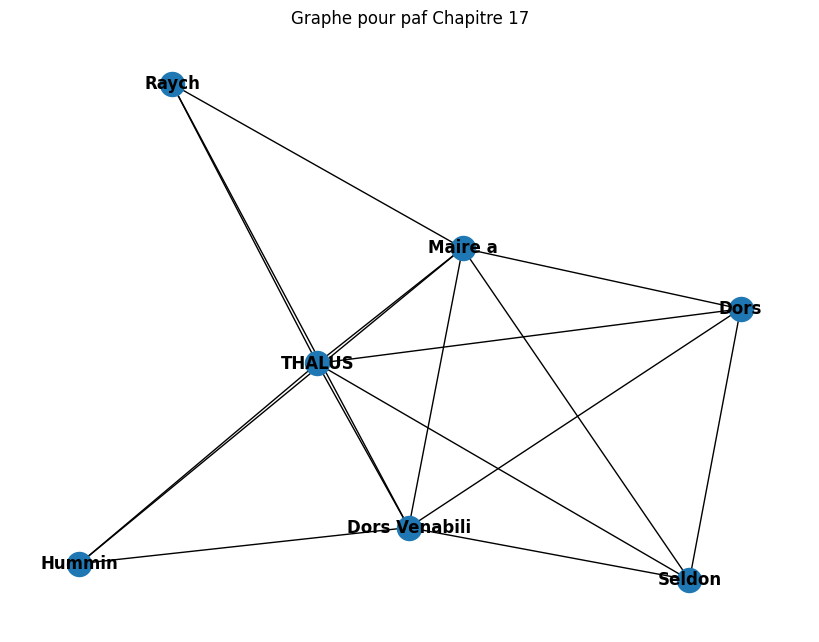

pour: Dors SELDON, les alias sont: Dors SELDON;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Dors SELDON, les alias sont: Dors SELDON;Seldon
pour: Raych Seldon, les alias sont: Raych Seldon;Seldon
pour: Dors SELDON, les alias sont: Dors SELDON;Seldon
pour: Seldon, les alias sont: Dors SELDON;Hari Seldon;Raych Seldon;Seldon
pour: Dors SELDON, les alias sont: Dors SELDON;Seldon
pour: Hummin, les alias sont: Hummin
pour: Dors SELDON, les alias sont: Dors SELDON;Seldon
pour: Seldon, les alias sont: Dors SELDON;Hari Seldon;Raych Seldon;Seldon
pour: Dors SELDON, les alias sont: Dors SELDON;Seldon
pour: Hummin, les alias sont: Hummin
pour: Dors SELDON, les alias sont: Dors SELDON;Seldon
pour: Mère Rittah, les alias sont: Mere Rittah
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Raych Seldon, les alias sont: Raych Seldon;Seldon
pour: Hari Seldon, les alias sont: Hari Seldon;Seldon
pour: Seldon, les alias sont: Dors SELDON;Hari Seldon;Raych Seldon;Seldon
pour:

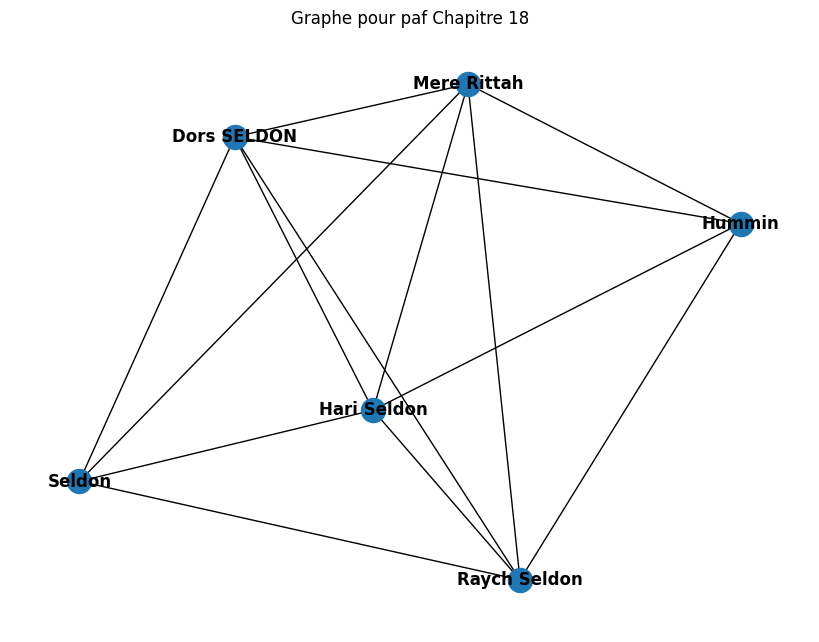

pour: Simpson, les alias sont: Simpson
pour: R. Sammy, les alias sont: R. Sammy
pour: Simpson, les alias sont: Simpson
pour: Vince Barrett, les alias sont: Vince Barrett;Vince
pour: Simpson, les alias sont: Simpson
pour: R. Sammy, les alias sont: R. Sammy
pour: Simpson, les alias sont: Simpson
pour: Vince, les alias sont: Vince Barrett;Vince
pour: Simpson, les alias sont: Simpson
pour: Baley, les alias sont: Baley
pour: Simpson, les alias sont: Simpson
pour: JULIUS ENDERBY, les alias sont: JULIUS ENDERBY;Enderby
pour: Simpson, les alias sont: Simpson
pour: Baley, les alias sont: Baley
pour: Simpson, les alias sont: Simpson
pour: Enderby, les alias sont: JULIUS ENDERBY;Enderby
pour: Simpson, les alias sont: Simpson
pour: Baley, les alias sont: Baley
pour: R. Sammy, les alias sont: R. Sammy
pour: Vince Barrett, les alias sont: Vince Barrett;Vince
pour: R. Sammy, les alias sont: R. Sammy
pour: Vince, les alias sont: Vince Barrett;Vince
pour: R. Sammy, les alias sont: R. Sammy
pour: Baley,

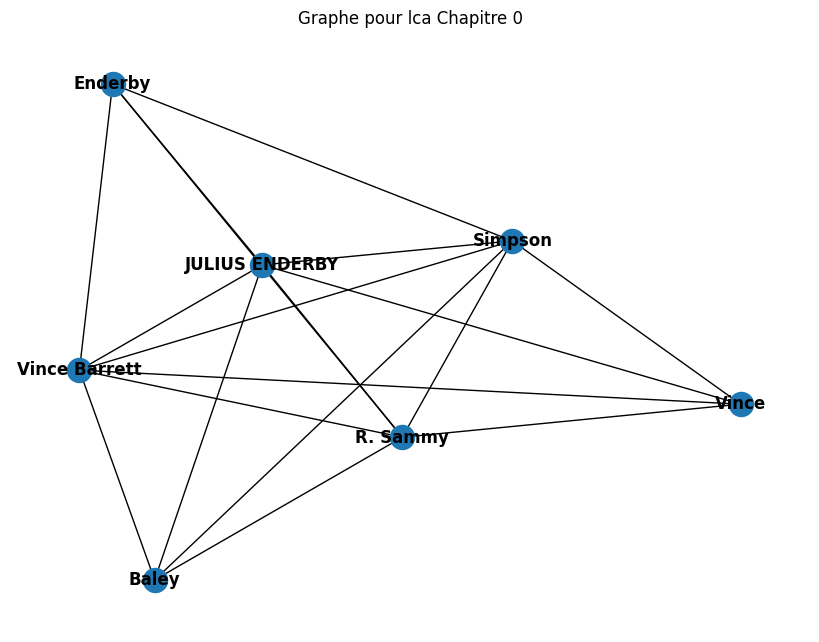

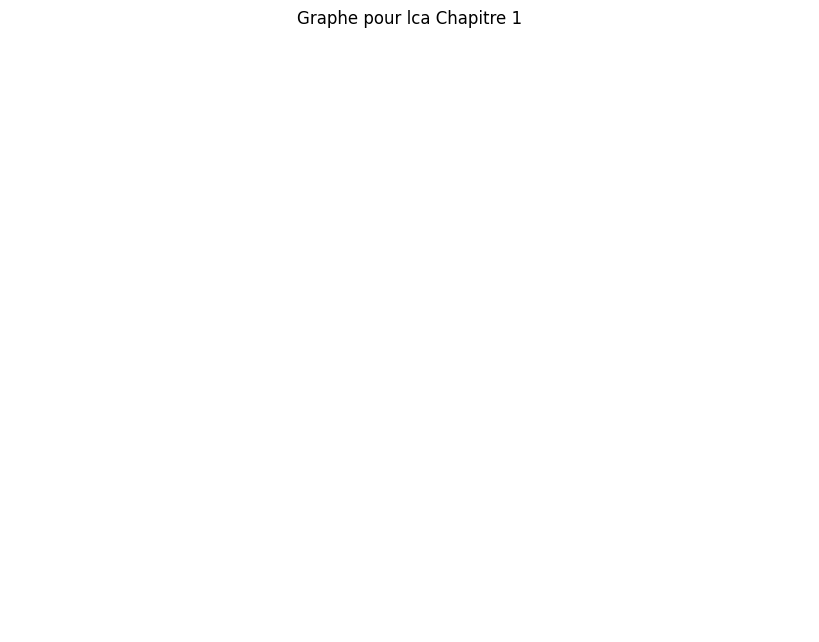

pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel
pour: R. Daneel, les alias sont: R. Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel
pour: Baley, les alias sont: Baley


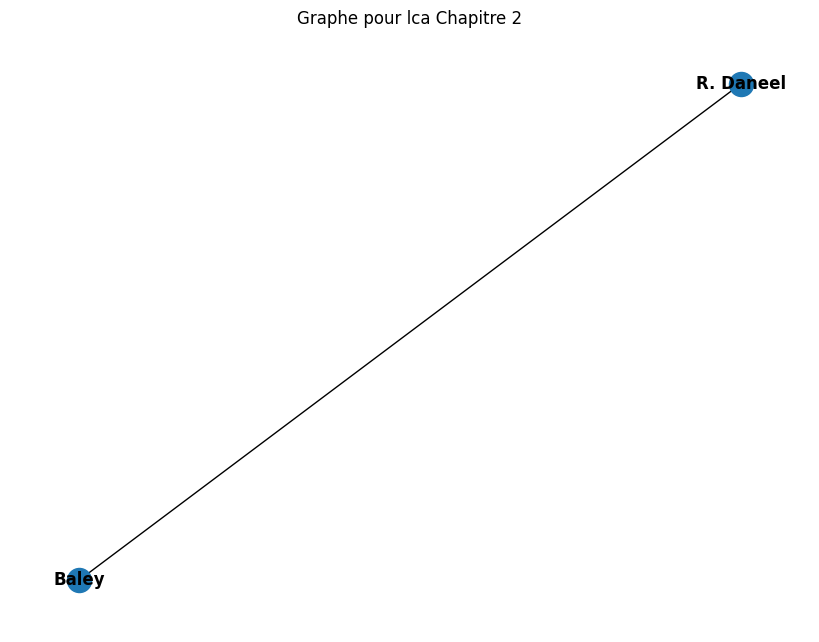

pour: Baley, les alias sont: Baley
pour: Elijah, les alias sont: Elijah
pour: Elijah, les alias sont: Elijah
pour: Baley, les alias sont: Baley


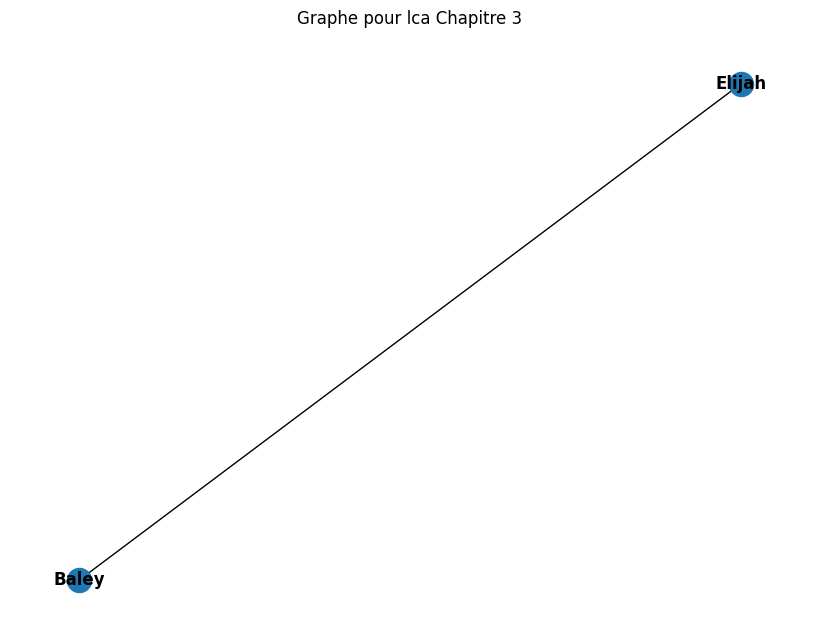

pour: Jessie, les alias sont: Jessie
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Olivaw, les alias sont: Olivaw
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Ben, les alias sont: Ben
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Jessie, les alias sont: Jessie
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Daneel, les alias sont: R. Daneel;Daneel
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Elijah, les alias sont: Elijah
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Baley, les alias sont: Baley


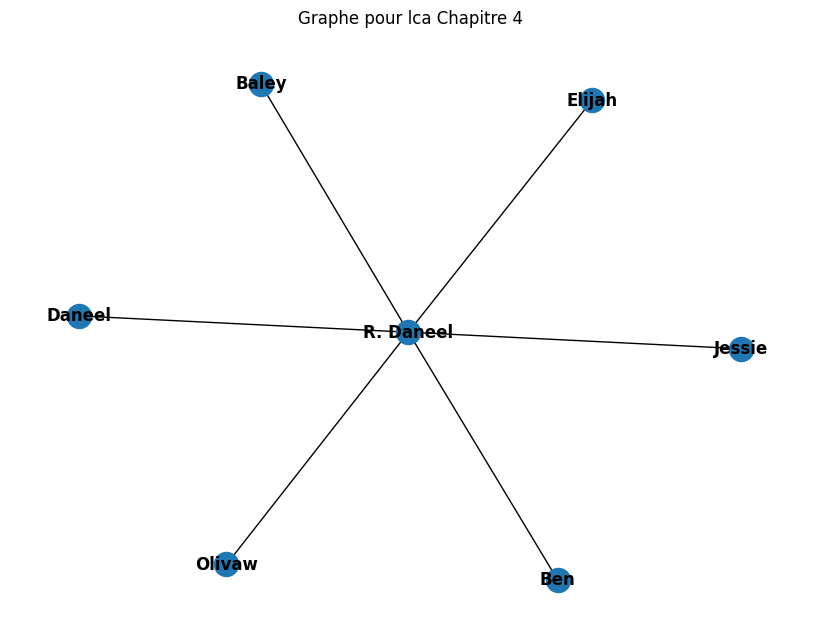

pour: Elijah Baley, les alias sont: Elijah Baley;Baley
pour: Jessie, les alias sont: Jessie
pour: Elijah Baley, les alias sont: Elijah Baley;Baley
pour: R. Daneel Olivaw, les alias sont: R. Daneel Olivaw
pour: Elijah Baley, les alias sont: Elijah Baley;Baley
pour: Baley, les alias sont: Elijah Baley;Baley
pour: Elijah Baley, les alias sont: Elijah Baley;Baley
pour: Jessie, les alias sont: Jessie
pour: Elijah Baley, les alias sont: Elijah Baley;Baley
pour: Jessie, les alias sont: Jessie
pour: Elijah Baley, les alias sont: Elijah Baley;Baley
pour: Jessie, les alias sont: Jessie
pour: Elijah Baley, les alias sont: Elijah Baley;Baley
pour: Jessie, les alias sont: Jessie
pour: Elijah Baley, les alias sont: Elijah Baley;Baley
pour: Baley, les alias sont: Elijah Baley;Baley
pour: Elijah Baley, les alias sont: Elijah Baley;Baley
pour: Lije, les alias sont: Lije
pour: Jessie, les alias sont: Jessie
pour: R. Daneel Olivaw, les alias sont: R. Daneel Olivaw
pour: R. Daneel Olivaw, les alias sont: 

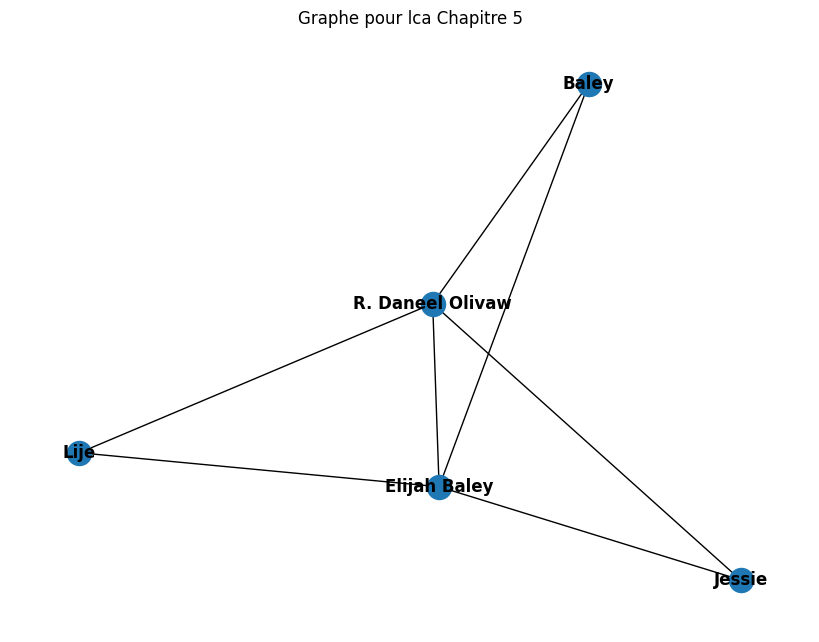

pour: Daneel, les alias sont: Daneel;R. Daneel
pour: Lije, les alias sont: Lije
pour: Daneel, les alias sont: Daneel;R. Daneel
pour: R. Sammy, les alias sont: R. Sammy
pour: Daneel, les alias sont: Daneel;R. Daneel
pour: Lije, les alias sont: Lije
pour: Daneel, les alias sont: Daneel;R. Daneel
pour: R. Daneel, les alias sont: Daneel;R. Daneel
pour: Enderby, les alias sont: Enderby
pour: Lije, les alias sont: Lije
pour: Enderby, les alias sont: Enderby
pour: R. Sammy, les alias sont: R. Sammy
pour: Enderby, les alias sont: Enderby
pour: Lije, les alias sont: Lije
pour: Enderby, les alias sont: Enderby
pour: R. Daneel, les alias sont: Daneel;R. Daneel
pour: Lije, les alias sont: Lije
pour: Baley, les alias sont: Baley
pour: Lije, les alias sont: Lije
pour: R. Sammy, les alias sont: R. Sammy
pour: Lije, les alias sont: Lije
pour: Daneel, les alias sont: Daneel;R. Daneel
pour: Lije, les alias sont: Lije
pour: Baley, les alias sont: Baley
pour: Lije, les alias sont: Lije
pour: R. Daneel, le

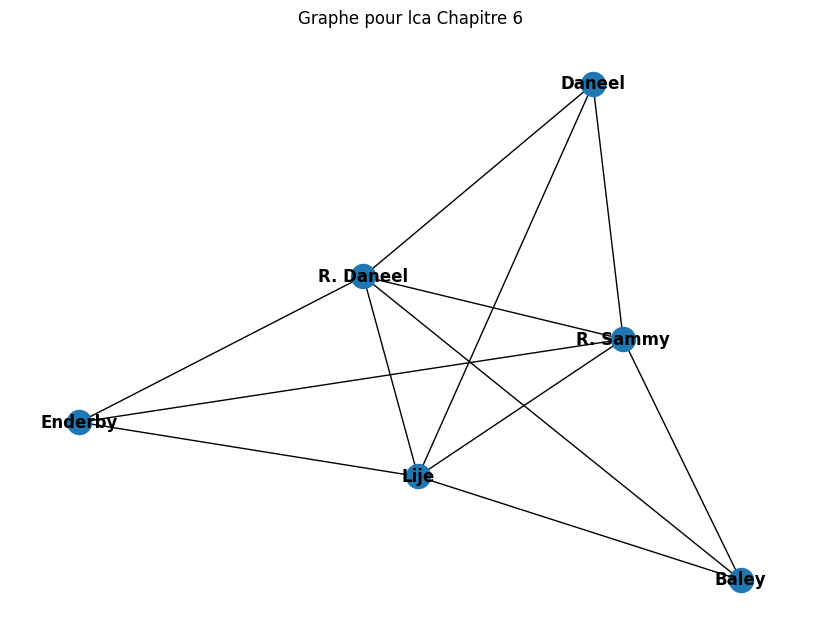

pour: Enderby, les alias sont: Enderby
pour: Dr Sarton, les alias sont: Dr Sarton
pour: Enderby, les alias sont: Enderby
pour: Dr Sarton, les alias sont: Dr Sarton
pour: Enderby, les alias sont: Enderby
pour: Dr Sarton, les alias sont: Dr Sarton
pour: Enderby, les alias sont: Enderby
pour: R. Daneel, les alias sont: R. Daneel
pour: Enderby, les alias sont: Enderby
pour: Dr Sarton, les alias sont: Dr Sarton
pour: Julius, les alias sont: Julius
pour: Dr Sarton, les alias sont: Dr Sarton
pour: Julius, les alias sont: Julius
pour: Dr Sarton, les alias sont: Dr Sarton
pour: Julius, les alias sont: Julius
pour: Dr Sarton, les alias sont: Dr Sarton
pour: Julius, les alias sont: Julius
pour: R. Daneel, les alias sont: R. Daneel
pour: Julius, les alias sont: Julius
pour: Dr Sarton, les alias sont: Dr Sarton
pour: Enderby, les alias sont: Enderby
pour: Dr Sarton, les alias sont: Dr Sarton
pour: Enderby, les alias sont: Enderby
pour: Dr Sarton, les alias sont: Dr Sarton
pour: Enderby, les alias s

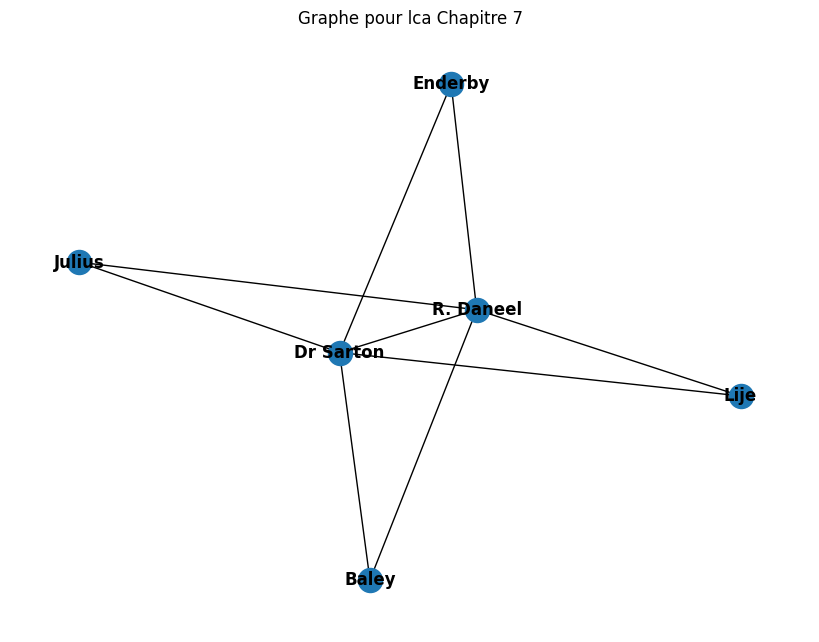

pour: R. Daneel, les alias sont: R. Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel
pour: Dr Fastolfe, les alias sont: Dr Fastolfe
pour: R. Daneel, les alias sont: R. Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel
pour: Lije, les alias sont: Lije
pour: Baley, les alias sont: Baley
pour: Dr Fastolfe, les alias sont: Dr Fastolfe
pour: Baley, les alias sont: Baley
pour: Dr Fastolfe, les alias sont: Dr Fastolfe
pour: Dr Fastolfe, les alias sont: Dr Fastolfe
pour: Baley, les alias sont: Baley
pour: Dr Fastolfe, les alias sont: Dr Fastolfe
pour: Baley, les alias sont: Baley
pour: Dr Fastolfe, les alias sont: Dr Fastolfe
pour: Lije, les alias sont: Lije


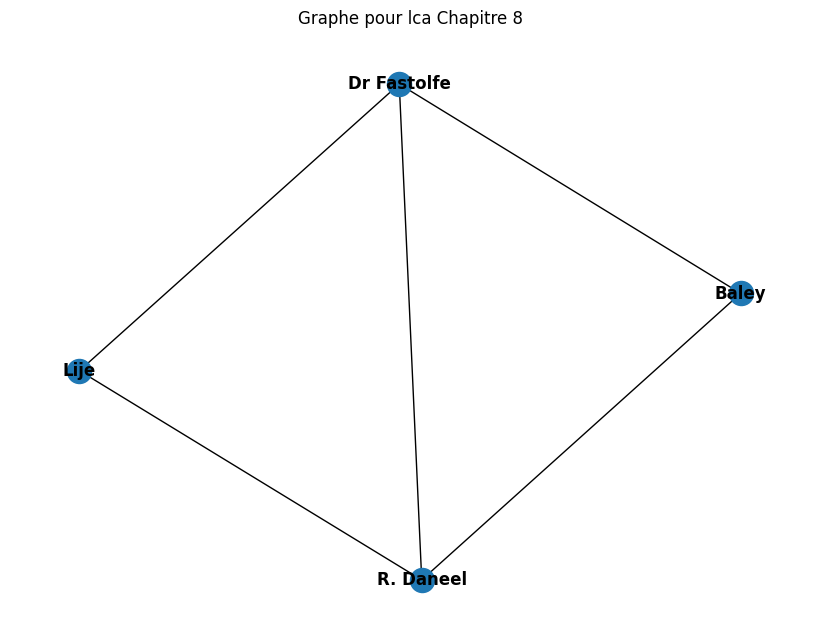

pour: R. Daneel, les alias sont: R. Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel
pour: Trinité, les alias sont: Trinite


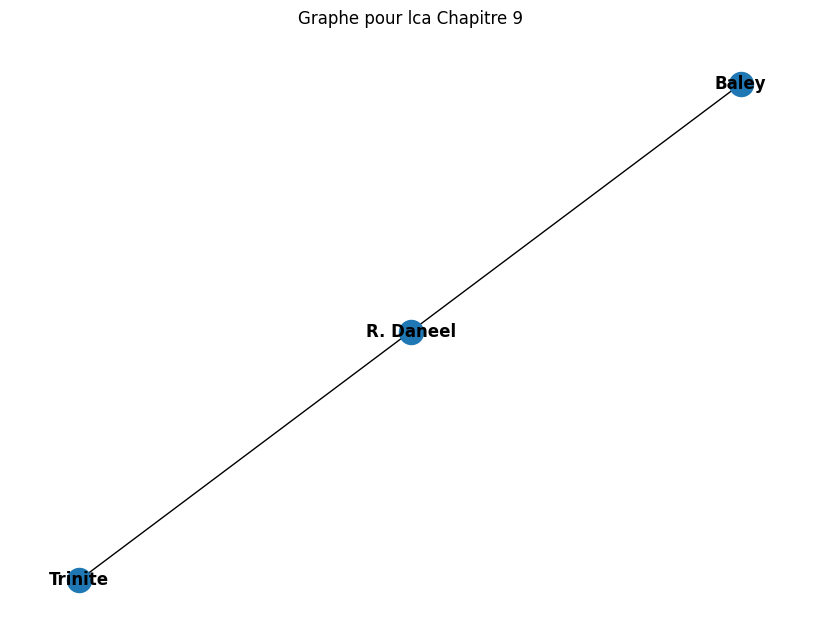

pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel
pour: R. Daneel, les alias sont: R. Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel
pour: Baley, les alias sont: Baley
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel
pour: R. Daneel, les alias sont: R. Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel
pour: Baley, les alias sont: Baley


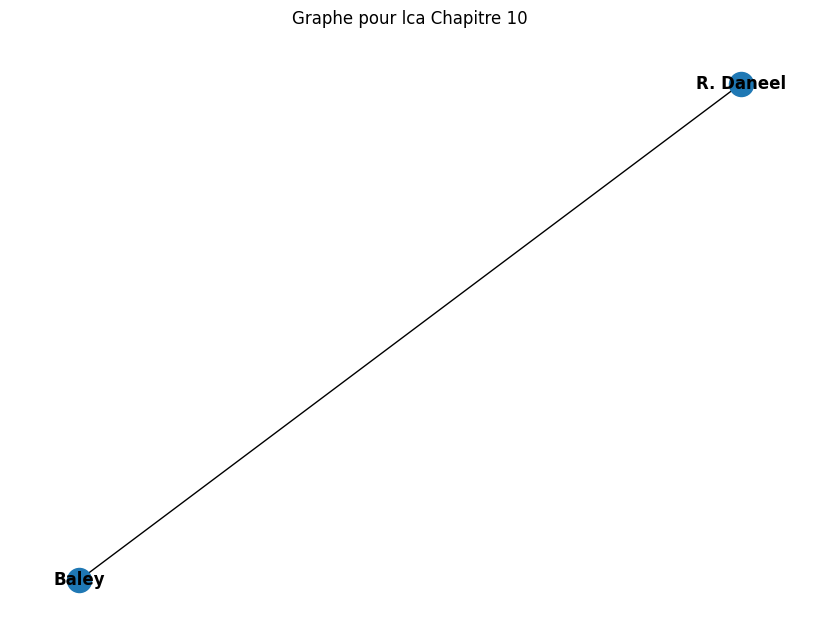

pour: R. Sammy, les alias sont: R. Sammy
pour: Lije, les alias sont: Lije
pour: R. Sammy, les alias sont: R. Sammy
pour: Baley, les alias sont: Baley
pour: R. Sammy, les alias sont: R. Sammy
pour: Lije, les alias sont: Lije
pour: R. Sammy, les alias sont: R. Sammy
pour: Baley, les alias sont: Baley
pour: R. Sammy, les alias sont: R. Sammy
pour: Enderby, les alias sont: Enderby
pour: R. Sammy, les alias sont: R. Sammy
pour: Lije, les alias sont: Lije
pour: R. Sammy, les alias sont: R. Sammy
pour: Baley, les alias sont: Baley
pour: R. Sammy, les alias sont: R. Sammy
pour: Julius, les alias sont: Julius
pour: R. Sammy, les alias sont: R. Sammy
pour: A. Gerrigel, les alias sont: A. Gerrigel
pour: Lije, les alias sont: Lije
pour: Baley, les alias sont: Baley
pour: Lije, les alias sont: Lije
pour: R. Sammy, les alias sont: R. Sammy
pour: Lije, les alias sont: Lije
pour: Baley, les alias sont: Baley
pour: Lije, les alias sont: Lije
pour: Enderby, les alias sont: Enderby
pour: Lije, les alias 

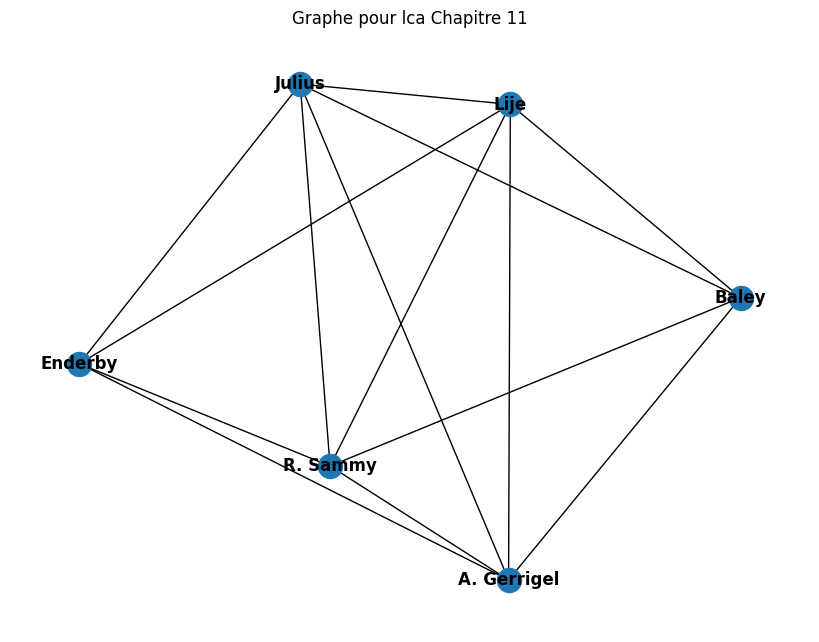

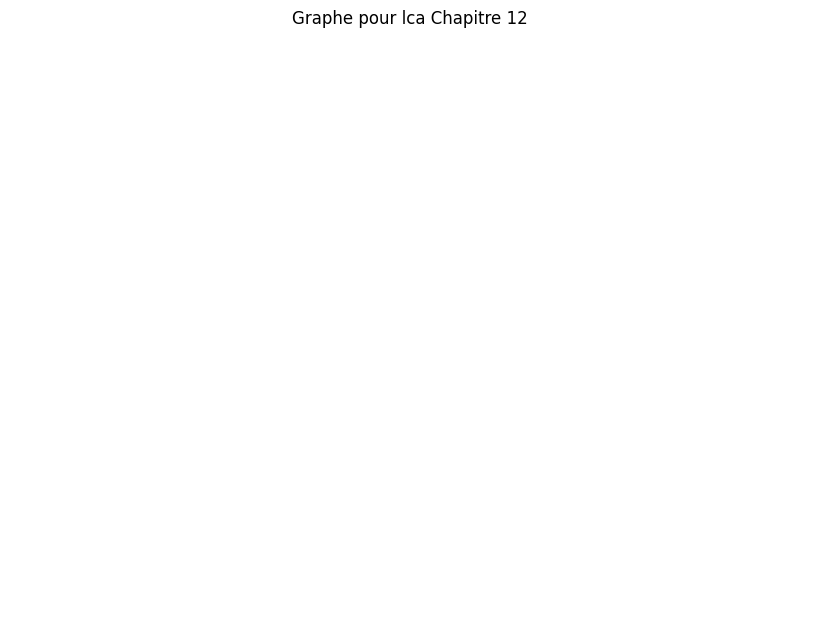

pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Baley, les alias sont: Baley
pour: Daneel, les alias sont: R. Daneel;Daneel
pour: Jessie, les alias sont: Jessie
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Jessie, les alias sont: Jessie
pour: Lije, les alias sont: Lije
pour: Jessie, les alias sont: Jessie
pour: Lije, les alias sont: Lije
pour: Jessie, les alias sont: Jessie
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Jessie, les alias sont: Jessie
pour: Lije, les alias sont: Lije
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Jessie, les alias sont: Jessie
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Jessie, les alias sont: Jessie
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Lije, les alias sont: Lije
pour: R. Daneel, les a

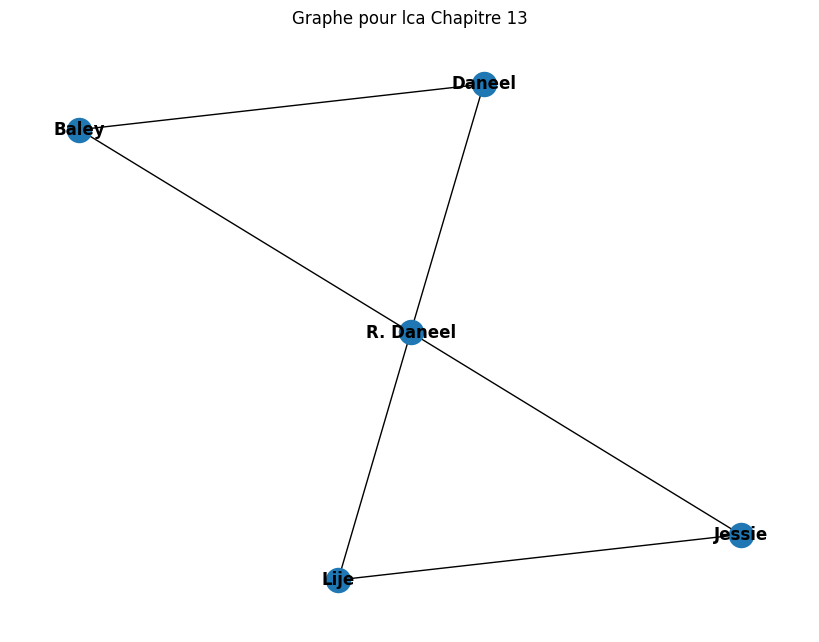

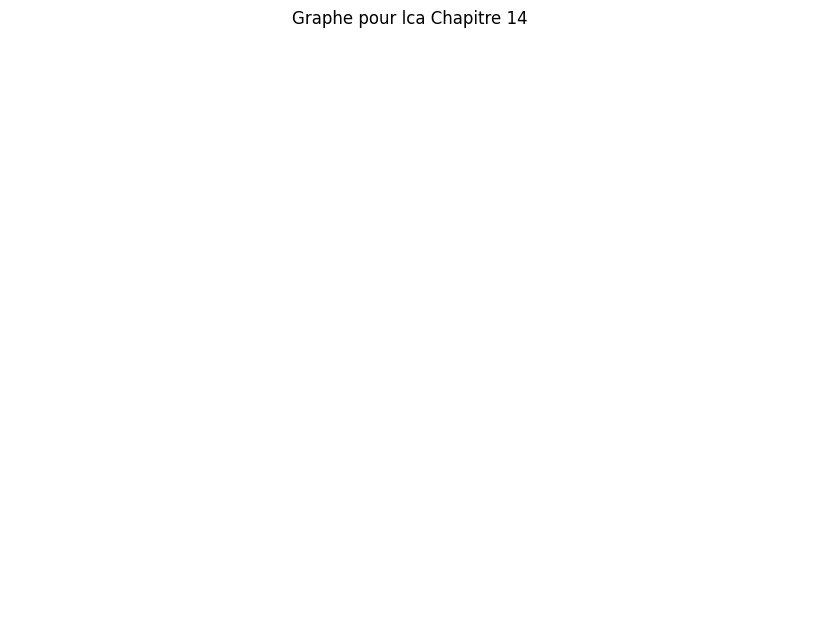

pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Francis, les alias sont: Francis
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Clousarr, les alias sont: Clousarr
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Clousarr, les alias sont: Clousarr
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Daneel, les alias sont: R. Daneel;Daneel
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Daneel, les alias sont: R. Daneel;Daneel
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Clousarr, les alias sont: Clousarr
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Daneel, les alias sont: R. Daneel;Daneel
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Clousarr, les alias sont: Clousarr
pour: R. Daneel, les alias sont: R. Daneel;Daneel
pour: Clousarr, les alias sont: Clou

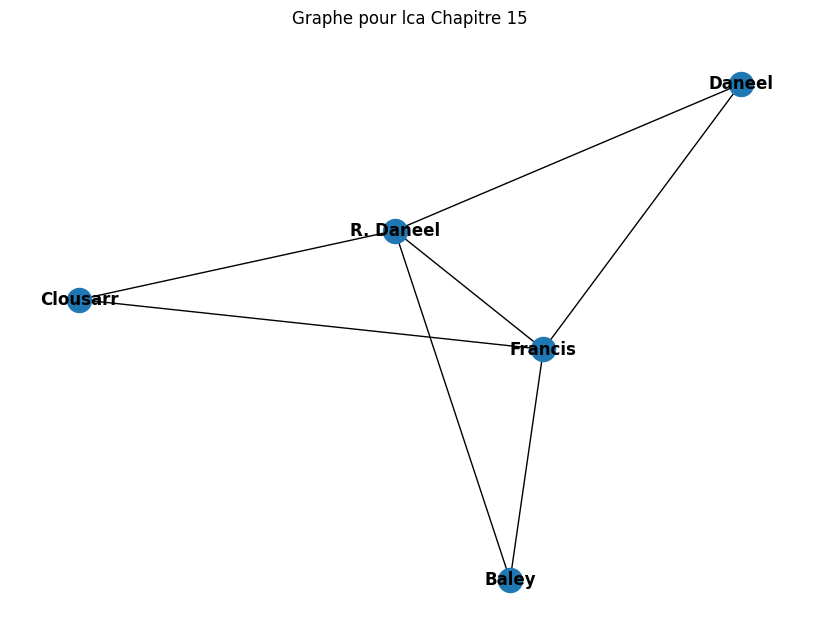

pour: Baley, les alias sont: Baley
pour: R. Daneel, les alias sont: R. Daneel


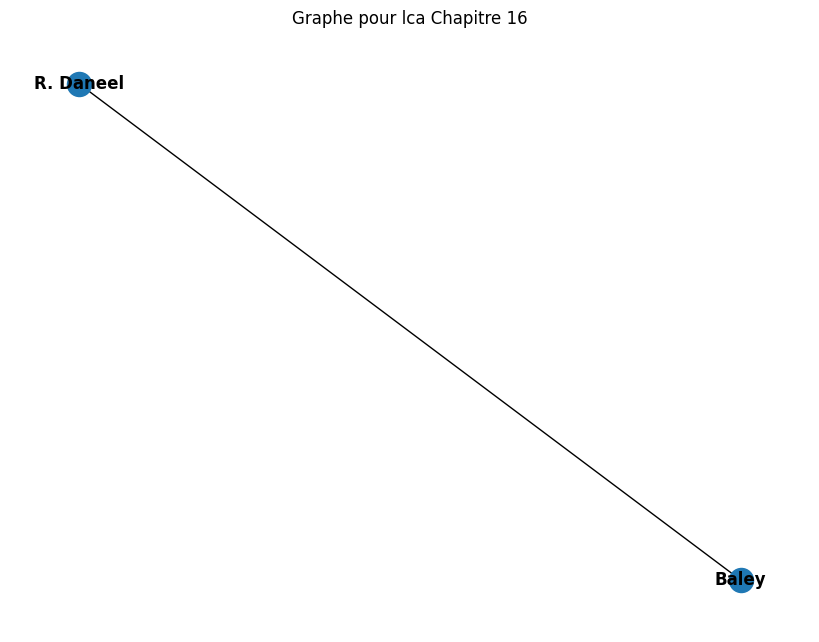

pour: Enderby, les alias sont: Enderby
pour: Clousarr, les alias sont: Clousarr
pour: Enderby, les alias sont: Enderby
pour: Baley, les alias sont: Baley
pour: Enderby, les alias sont: Enderby
pour: Clousarr, les alias sont: Clousarr
pour: Enderby, les alias sont: Enderby
pour: Clousarr, les alias sont: Clousarr
pour: Enderby, les alias sont: Enderby
pour: R. Sammy, les alias sont: R. Sammy
pour: Enderby, les alias sont: Enderby
pour: Clousarr, les alias sont: Clousarr
pour: Enderby, les alias sont: Enderby
pour: Dr Sarton, les alias sont: Dr Sarton
pour: Clousarr, les alias sont: Clousarr
pour: Baley, les alias sont: Baley
pour: Clousarr, les alias sont: Clousarr
pour: Enderby, les alias sont: Enderby
pour: Clousarr, les alias sont: Clousarr
pour: Enderby, les alias sont: Enderby
pour: Clousarr, les alias sont: Clousarr
pour: R. Sammy, les alias sont: R. Sammy
pour: Clousarr, les alias sont: Clousarr
pour: Dr Sarton, les alias sont: Dr Sarton
pour: Baley, les alias sont: Baley
pour: E

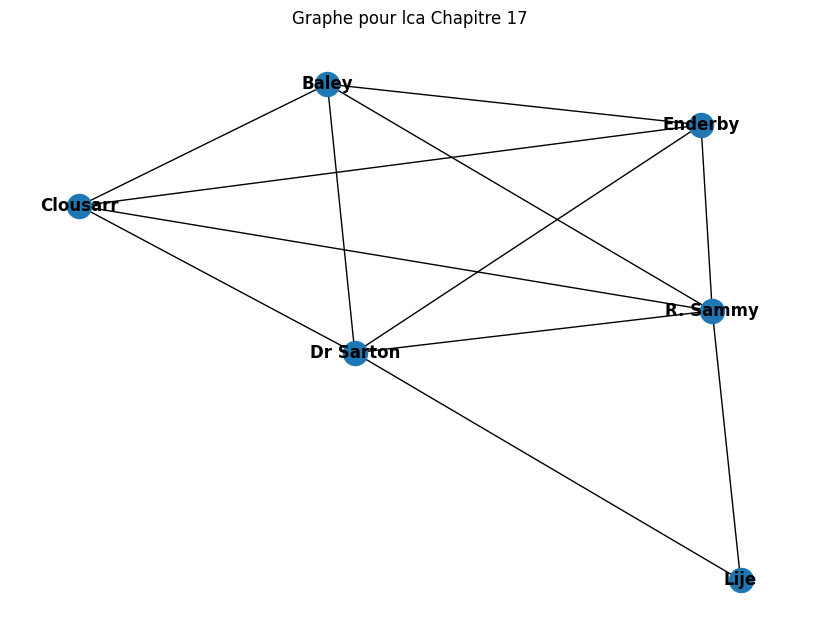

In [9]:
import os
import itertools
import networkx as nx
import matplotlib.pyplot as plt
from unidecode import unidecode

# (chapitres, code du livre)
books = [
    (list(range(1, 20)), "paf"),
    (list(range(1, 19)), "lca"),
]

df_dict = {"ID": [], "graphml": []}

for chapters, book_code in books:
    if book_code == 'paf':  # Corrigez la comparaison avec 'book_code'
        folder_path = r'C:\Users\etudiant\Documents\NER_cam\prelude_a_fondation'
    else:
        folder_path = r'C:\Users\etudiant\Documents\NER_cam\les_cavernes_d_acier'

    for chapter in chapters:
        file_path = os.path.join(folder_path, f"chapter_{chapter}.txt.preprocessed")
        if os.path.exists(file_path):
            text = extract_text_from_file(file_path)
            entities = nlp(text)
            ner = [entity['word'] for entity in entities if entity['entity_group'] == 'PER']
            
            mots = text.split()

            G = nx.Graph()

            combinations = list(itertools.combinations(ner, 2))

            for n in combinations:
                all_allias0 = []
                all_allias1 = []
                if n[0] != n[1]:
                    if nombre_mots_entre_mots(mots, n[0], n[1]) < 26:
                        #print(f"combinaison: {n}")
                    
                        G.add_edge(unidecode(n[0]),unidecode(n[1]))

                        for alias in ner:
                            alias_unaccented = unidecode(alias)
                            n0_unaccented = unidecode(n[0])

                            if len(alias_unaccented) > len(n0_unaccented):
                                a = alias_unaccented
                                b = n0_unaccented
                            else:
                                a = n0_unaccented
                                b = alias_unaccented

                            if a.lower().find(b.lower()) != -1:
                                all_allias0.append(alias)

                        for alias in ner:
                            alias_unaccented = unidecode(alias)
                            n1_unaccented = unidecode(n[1])

                            if len(alias_unaccented) > len(n1_unaccented):
                                a = alias_unaccented
                                b = n1_unaccented
                            else:
                                a = n1_unaccented
                                b = alias_unaccented

                            if a.lower().find(b.lower()) != -1:
                                all_allias1.append(alias)

                        nouvelle_liste0 = []     
                        [nouvelle_liste0.append(unidecode(x)) for x in all_allias0 if unidecode(x) not in nouvelle_liste0]
                        nouvelle_liste1 = []     
                        [nouvelle_liste1.append(unidecode(x)) for x in all_allias1 if unidecode(x) not in nouvelle_liste1]
                        names0 = ';'.join(map(str, nouvelle_liste0)) 
                        names1 = ';'.join(map(str, nouvelle_liste1))


                        G.nodes[unidecode(n[0])]["names"] = names0
                        G.nodes[unidecode(n[1])]["names"] = names1

                        #print(n)
                        print(f'pour: {n[0]}, les alias sont: {names0}')
                        print(f'pour: {n[1]}, les alias sont: {names1}')

            df_dict["ID"].append(f"{book_code}{chapter-1}")

            plt.figure(figsize=(8, 6))
            pos = nx.spring_layout(G)
            nx.draw(G, pos, with_labels=True, font_weight='bold')
            plt.title(f"Graphe pour {book_code} Chapitre {chapter-1}")
            plt.show()

            graphml = "".join(nx.generate_graphml(G))
            df_dict["graphml"].append(graphml)

# Création du DataFrame et enregistrement dans un fichier CSV
df = pd.DataFrame(df_dict)
df.set_index("ID", inplace=True)
df.to_csv("./ner_submission.csv")
